In [319]:
import matplotlib.pyplot as plt
import os
import json
import random
import numpy as np
from prettytable import PrettyTable

In [320]:
def read_experiment_data(folder_path, filename):
    file_path = os.path.join(folder_path, filename)

    if os.path.exists(file_path):
        with open(file_path, 'r') as file:
            data = json.load(file)
    else:
        print(f"File '{filename}' does not exist.")
    return data

def read_all_experiments_data(params):
    folder_path = f'./experiments/{params}'
    combined_data = {}
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        with open(file_path, 'r') as file:
            data = json.load(file)
            key = os.path.splitext(filename)[0]
            print(key)
            combined_data[key] = data
    return combined_data

In [420]:
def print_table(data):
    table = PrettyTable()
    table.field_names = ["Arrival Rate", "Avg Time Spent", "Max Time Spent", "Avg Queue Size"]

    for arrival_rate in ['0.5', '0.7', '0.8', '0.9', '0.95', '0.99', '0.999']:
        avg_time_spent = np.mean(data[arrival_rate]['avg_time_spent'])
        max_time_spent = np.mean(data[arrival_rate]['max_time_spent'])
        avg_queue_size = np.mean(data[arrival_rate]['avg_queue_size'])
        table.add_row([arrival_rate, avg_time_spent, max_time_spent, avg_queue_size])

    table.align = "r"
    table.float_format = ".2"
    print(table)

def print_combined_table(combined_data):
    table = PrettyTable()
    table.field_names = ["Scenario", "Arrival Rate", "Avg Time Spent", "Max Time Spent", "Avg Queue Size"]
    scenarios = ['s1_uss', 's1_uss_d2', 's1_uss_d3', 's1_uss_d5', 's2_uss_different_1', 's2_uss_d2_different_1', 's2_uss_d3_different_1', 's2_uss_d5_different_1']

    for scenario in scenarios:
        table.add_row([scenario, '', '', '', ''])
        for arrival_rate in ['0.5', '0.7', '0.8', '0.9', '0.95', '0.99', '0.999']:
            avg_time_spent = np.mean(combined_data[scenario][arrival_rate]['avg_time_spent'])
            max_time_spent = np.mean(combined_data[scenario][arrival_rate]['max_time_spent'])
            avg_queue_size = np.mean(combined_data[scenario][arrival_rate]['avg_queue_size'])
            table.add_row(['', arrival_rate, avg_time_spent, max_time_spent, avg_queue_size])
        table.add_row(['', '', '', '', ''])
    
    table.align = "r"
    table.float_format = ".2"
    print(table)    

In [443]:
def plot(data):
    
    plt.figure(figsize=(14, 7))
    for arrival_rate in ['0.5', '0.7', '0.8', '0.9', '0.95', '0.99', '0.999']:
        plt.scatter(data[arrival_rate]['num_servers'][1:], data[arrival_rate]['avg_time_spent'][1:], s=2, label=f'lambda: {arrival_rate}')

    plt.xticks(fontproperties='Arial', fontsize=9)
    plt.xticks(fontproperties='Arial', fontsize=9)
    plt.yticks(fontproperties='Arial', fontsize=9)
    plt.xlabel('Number of servers', fontsize='9')
    plt.ylabel('Average time spent in the system', fontsize='9')
    plt.legend(fontsize='9')
    plt.show()

    plt.figure(figsize=(14, 7))
    for arrival_rate in ['0.5', '0.7', '0.8', '0.9', '0.95', '0.99', '0.999']:
        plt.scatter(data[arrival_rate]['num_servers'][1:], data[arrival_rate]['avg_queue_size'][1:], s=2, label=f'lambda: {arrival_rate}')

    plt.xticks(fontproperties='Arial', fontsize=9)
    plt.xticks(fontproperties='Arial', fontsize=9)
    plt.yticks(fontproperties='Arial', fontsize=9)
    plt.xlabel('Number of servers', fontsize='9')
    plt.ylabel('Average queue size', fontsize='9')
    plt.legend(fontsize='9')
    plt.show()

def plot_combined(combined_data):
    scenarios = ['s1_uss', 's1_uss_d2', 's1_uss_d3', 's1_uss_d5', 's2_uss', 's2_uss_d2', 's2_uss_d3', 's2_uss_d5']

    for arrival_rate in ['0.5', '0.7', '0.8', '0.9', '0.95', '0.99', '0.999']:
        plt.figure(figsize=(14, 7))
        for scenario in scenarios:
            plt.plot(combined_data[scenario][arrival_rate]['interarrival_time'], combined_data[scenario][arrival_rate]['avg_time_spent'], label=f'scenario: {scenario}')

    plt.xticks(fontproperties='Arial', fontsize=9)
    plt.yticks(fontproperties='Arial', fontsize=9)
    plt.xlabel('Interarrival time', fontsize='9')
    plt.ylabel('Average time spent in the system', fontsize='9')
    plt.title(f'Lambda = {arrival_rate}')
    plt.legend(fontsize='9')
    plt.show()

In [444]:
def results(data):
    print_table(data)
    plot(data)

In [445]:
folder_path = './experiments/1.0_10000/'

# Pierwszy scenariusz

### Identyczne serwery i zadania

#### a) jednostajny wybór serwera

+--------------+----------------+----------------+----------------+
| Arrival Rate | Avg Time Spent | Max Time Spent | Avg Queue Size |
+--------------+----------------+----------------+----------------+
|          0.5 |           1.00 |           9.80 |           0.91 |
|          0.7 |           1.01 |           9.84 |           0.94 |
|          0.8 |           1.01 |           9.87 |           0.95 |
|          0.9 |           1.02 |           9.91 |           0.97 |
|         0.95 |           1.02 |           9.99 |           0.98 |
|         0.99 |           1.08 |          10.01 |           1.03 |
|        0.999 |           1.06 |          10.03 |           1.02 |
+--------------+----------------+----------------+----------------+


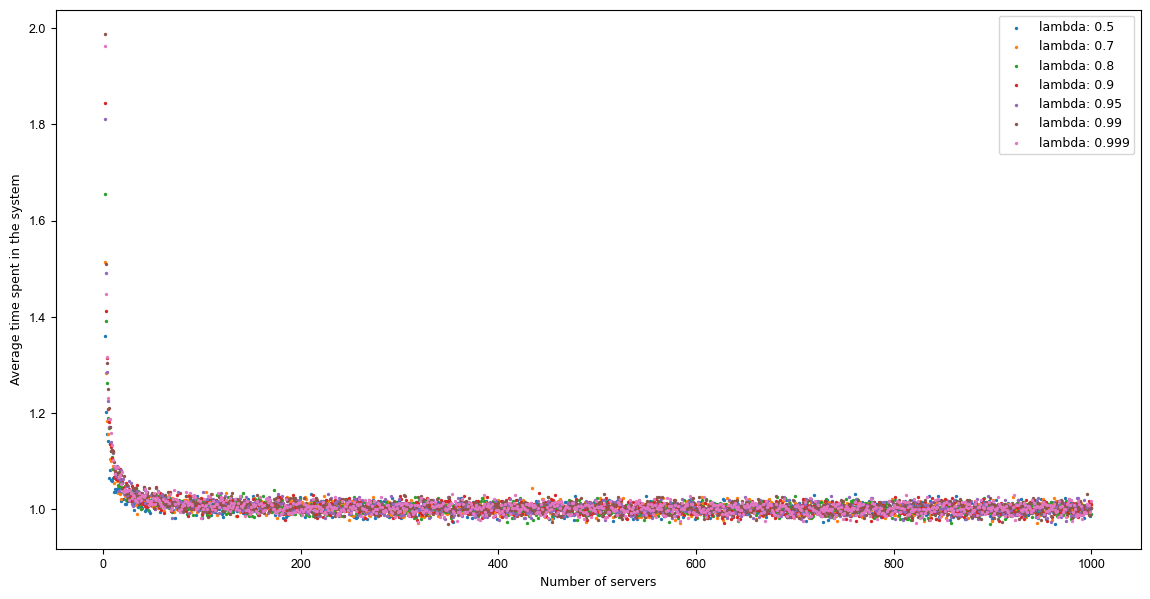

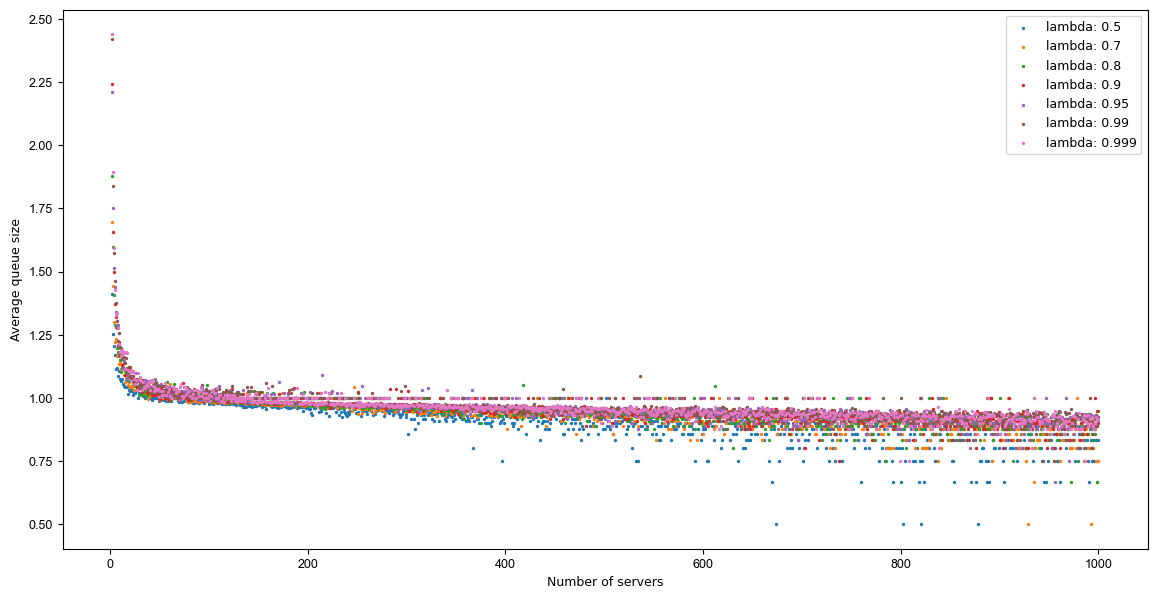

In [448]:
results(read_experiment_data(folder_path, 's1_uss'))

#### b) wybór mniej obciążonego z 2 jednostajnie wybranych serwerów

+--------------+----------------+----------------+----------------+
| Arrival Rate | Avg Time Spent | Max Time Spent | Avg Queue Size |
+--------------+----------------+----------------+----------------+
|          0.5 |           1.00 |           9.81 |           0.06 |
|          0.7 |           1.00 |           9.81 |           0.08 |
|          0.8 |           1.00 |           9.80 |           0.10 |
|          0.9 |           1.01 |           9.86 |           0.11 |
|         0.95 |           1.02 |           9.91 |           0.13 |
|         0.99 |           1.05 |           9.90 |           0.17 |
|        0.999 |           1.08 |          10.01 |           0.20 |
+--------------+----------------+----------------+----------------+


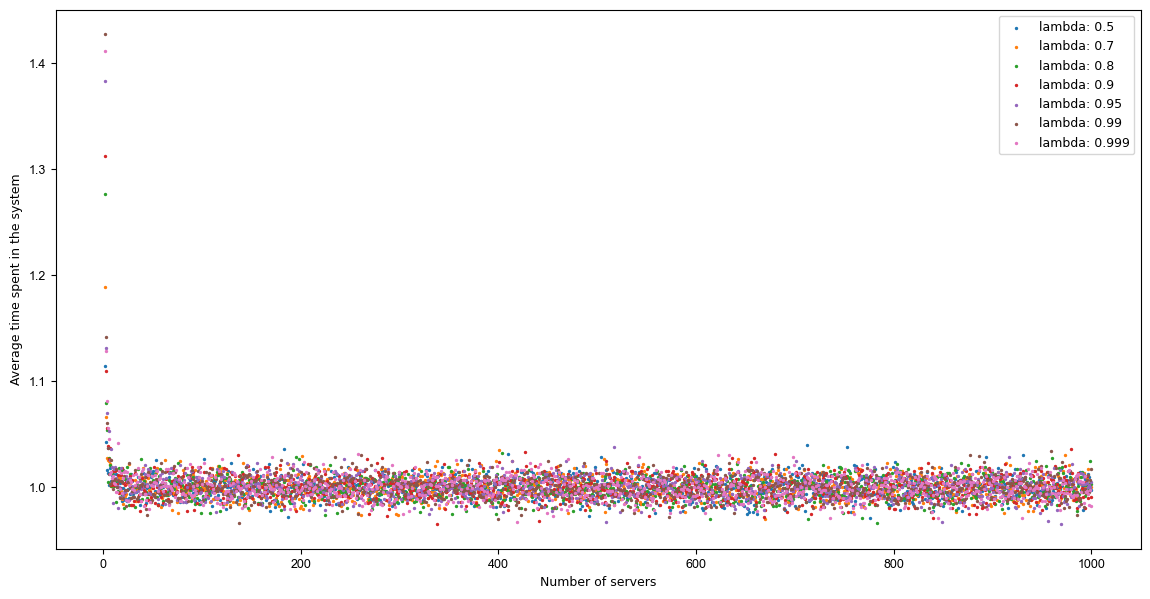

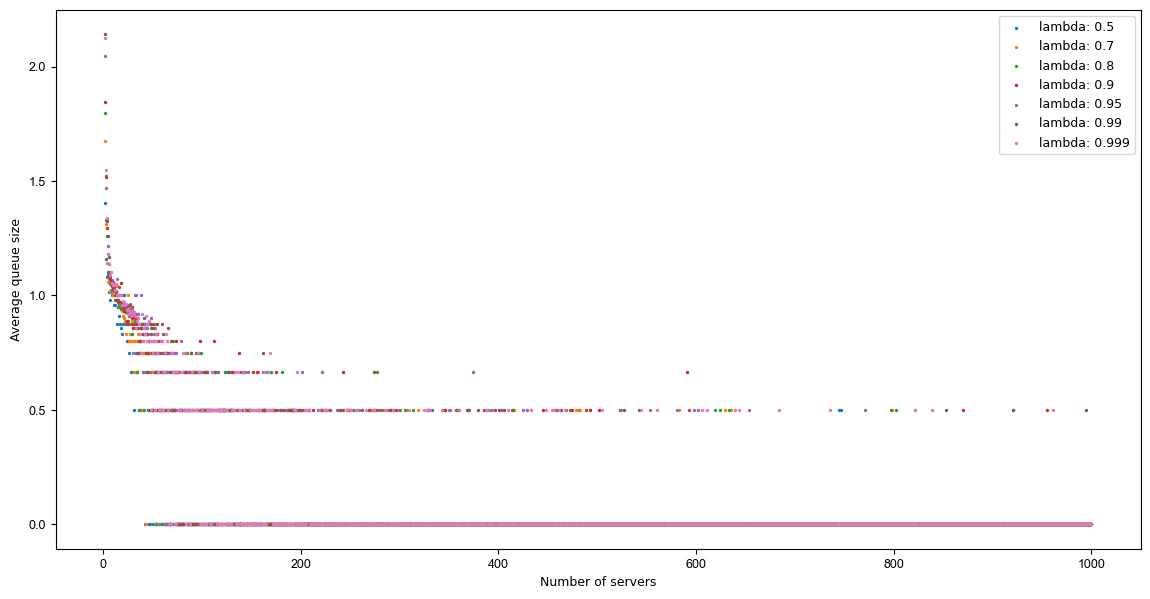

In [449]:
results(read_experiment_data(folder_path, 's1_uss_d2'))

#### c) wybór mniej obciążonego z d jednostajnie wybranych serwerów

In [ ]:
results(read_experiment_data(folder_path, 's1_uss_d3'))

In [ ]:
results(read_experiment_data(folder_path, 's1_uss_d5.json'))

# Drugi scenariusz

### Serwery o różnej szybkości, takie same zadania

#### a) jednostajny wybór serwera

In [ ]:
results(read_experiment_data(folder_path, 's2_uss.json'))

#### b) wybór mniej obciążonego z 2 jednostajnie wybranych serwerów

In [ ]:
results(read_experiment_data(folder_path, 's2_uss_d2.json'))

#### c) wybór mniej obciążonego z d jednostajnie wybranych serwerów

In [ ]:
results(read_experiment_data(folder_path, 's2_uss_d3.json'))

In [ ]:
results(read_experiment_data(folder_path, 's2_uss_d5.json'))

#### d) wybór mniej obciążonego z 2 niejednostajnie wybranych serwerów

#### e) wybór mniej obciążonego z d niejednostajnie wybranych serwerów

# Trzeci scenariusz

### Serwery o różnej szybkości, różne zadania

#### a) jednostajny wybór serwera

#### b) wybór mniej obciążonego z 2 jednostajnie wybranych serwerów

#### c) wybór mniej obciążonego z d jednostajnie wybranych serwerów

#### d) wybór mniej obciążonego z 2 niejednostajnie wybranych serwerów

#### e) wybór mniej obciążonego z d niejednostajnie wybranych serwerów

# Combined

In [ ]:
print_combined_table(read_all_experiments_data('1.0_10_10000_1000'))

In [ ]:
plot_combined(read_all_experiments_data('1.0_10_10000_1000'))